<h1>CNN-RNN Model</h1>

In diesem Versuch wollen wir das CIFAR10 Dataset nutzen und die verschiedenen Bilder klassifizieren. 

Anders als bei den anderen soll hier ein RNN Layer eingesetzt werden. Hier wird für das CNN Model 3 verschiedene Layers getestet.: <br>
SimpleRNN, LSTM und GRU

In einigen Szenarien kann der Einsatz von RNN Layer helfen. RNN ist dafür ausgelegt sequenzielle Daten zu verbreiten, dabei find es auch Einsatz bei nichtsequentiellen Problemen.

In [59]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import visualkeras

In [77]:
# Lade Dataset #
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [61]:
X_train.shape

(50000, 32, 32, 3)

Bild: 32x32 und Channel: 3

In [62]:
y_train[:3]  # Klassen

array([[6],
       [9],
       [9]], dtype=uint8)

In [72]:
y_train.shape

(50000, 1)

In [82]:
y_train = y_train.reshape(-1, )

In [83]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [78]:
X_train_scaled = X_train / 255   
X_test_scaled  =  X_test / 255

C:\Users\Alexander\AppData\Local\Temp\ipykernel_22624\128572581.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[i].set_title(klass_names[int(y_train[i])])


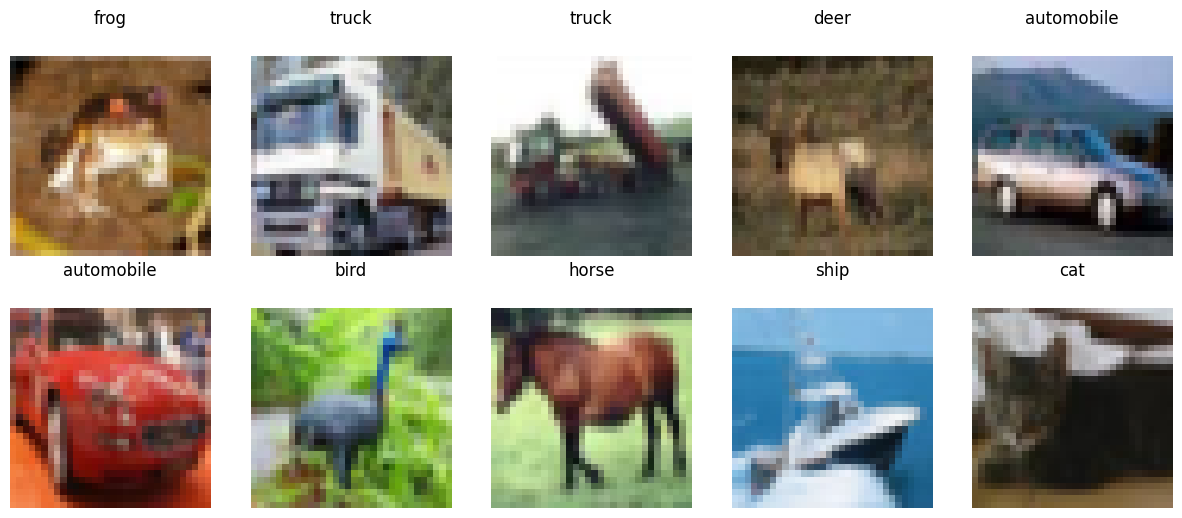

In [64]:
klass_names = {0: "airplane", 1:"automobile",2:"bird",
              3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck" }

fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()

for i in range(10):
    axs[i].set_axis_off()
    axs[i].set_title(klass_names[int(y_train[i])])
    axs[i].matshow(X_train[i])

Für den Versuch werden wir als Basis ein CNN Model erstellen und die Ergebnisse am Ende vergleichen. 

In [126]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cnn_rnn/base_cnn", histogram_freq=1)

model_cnn.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)


In [127]:
model_cnn.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,793,194 (10.66 MB)

 Trainable params: 2,793,194 (10.66 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Alexander\anaconda3\envs\tensorflow\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


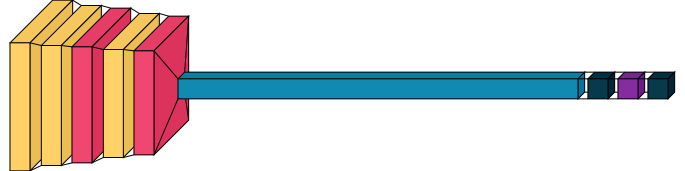

In [128]:
visualkeras.layered_view(model_cnn)

In [129]:
history_cnn = model_cnn.fit(X_train_scaled, y_train, callbacks=[tb_callback], epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3569 - loss: 1.7646
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5701 - loss: 1.1958
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6294 - loss: 1.0378
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6696 - loss: 0.9266
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6884 - loss: 0.8623
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7172 - loss: 0.7798
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7419 - loss: 0.7124
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7617 - loss: 0.6549
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7756 - loss: 0.6091
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.7957 - loss: 0.5529
